In [1]:
# Import necessary libraries
import random
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:

closed_minded= {
    'BRAD' : [],
    'JANET' : [],
    'DR SCOTT' : [],
    'ROCKY' : [],
    'NARRATOR' : [],  
}
open_minded= {
    'RIFF RAFF' : [],
    'MAGENTA' : [],
    'FRANK' : [],
    'COLUMBIA' : [],
    'EDDIE':[]
}


In [38]:
rhps=open('rhps.txt')
rhps_text=rhps.read()

for character, statements in closed_minded.items():
    start=0
    while start != -1:
        start=rhps_text.find(character + '\n')
        temp=rhps_text[start:]
        stop=temp.find('\n\n')
        statement=temp[:stop]
        closed_minded[character].append(statement)
        rhps_text=rhps_text.replace(statement, '')
        

for character, statements in open_minded.items():
    start=0
    while start != -1:
        start=rhps_text.find(character + '\n')
        temp=rhps_text[start:]
        stop=temp.find('\n\n')
        statement=temp[:stop]
        open_minded[character].append(statement)
        rhps_text=rhps_text.replace(statement, '')


In [5]:
closed_minded['DR SCOTT']

['DR SCOTT\nBrad!  What are you doing here?']

In [5]:
print(rhps_text)

ï»¿

THE
 HORROR
PICTURE SHOW

A SCREENPLAY BY JIM SHARMAN AND RICHARD O'BRIEN

Adapted from "The Rocky Horror Show" a musical
with Book, Music & Lyrics by Richard O'Brien

-----

1	THE FIRST IMAGE IS A SET OF RED VELVET CINEMA CURTAINS

Soft Drum-Roll.

2	THEY SPLIT OPTICALLY TO REVEAL THE DISTRIBUTION COMPANY LOGO.

Fanfare.

3	A SMALL WHITE SCREEN - ACADEMY SIZE - APPEARS IN THE MIDDLE OF THE
WIDE-SCREEN FORMAT

On the sides of the image are stationary sprocket holes of celluloid.
SCIENCE FICTION DOUBLE FEATURE * Musical Introduction.
Film head runs down numbers:  10, 9, 8, 7, 6, 5, 4, 3, 2, 1, START.
Very scratched.  During the SONG we see snatches of the films mentioned
in SONG.  They look old and scratched and they are INTERCUT with flashes
of white screen, burnt celluloid, etc.

SONG:		"SCIENCE FICTION DOUBLE FEATURE"

4	THE DAY THE EARTH STOOD STILL - THE END SEQUENCE OF THE ROBOT CARRYING
THE HERO

VOICE OVER
Michael Rennie was ill.
The day the earth stood still
But he told us

In [5]:
random.seed(10)  # For reproducible random numbers

#add in something later that tests if they have encountered a character 2-3 times then they switch sides? 


# Each agent in the model is represented by an Agent object
class Agent:
    # Class constructor - initializes all the properties of an Agent object
    def __init__(self, agent_type, agent_name, agent_statement):
        self.type = agent_type
        self.name = agent_name
        self.statement = agent_statement.strip().replace('\n', ' ') # A bit of cleaning...
        self.draw_location()

    # Randomly place an agent on the virtual "grid"
    def draw_location(self):
        self.location = random.uniform(0, 1), random.uniform(0, 1)

        
    # Compute the Euclidean distance between self and other agent.
    def get_distance(self, other):
        a = (self.location[0] - other.location[0])**2
        b = (self.location[1] - other.location[1])**2
        return sqrt(a + b)

    # Determine if an agent is happy
    # True if sufficient number of nearest neighbors are of the same type.
    def happy(self, agents):
        distances = []
        # distances is a list of pairs (d, agent), where d is distance from
        # agent to self
        for agent in agents:
            if self != agent:
                distance = self.get_distance(agent)
                distances.append((distance, agent))
        
        # == Sort from smallest to largest, according to distance == #
        distances.sort()
        
        # == Extract the neighboring agents == #
        neighbors = [agent for d, agent in distances[:num_neighbors]]
        # Unlike in the original model code, we will save the list
        # of nearest neighbors as a property of each agent - this way
        # each agent always knows its nearest neighbors
        self.neighbors = neighbors
        
        # == Count how many neighbors have the same type as self == #
        num_same_type = sum(self.type == agent.type for agent in neighbors)
        return num_same_type >= require_same_type

    
    # Update agent's position.
    # If agent is not happy, then randomly choose new locations until happy.
    def update(self, agents):
        while not self.happy(agents):
            self.draw_location()

In [6]:
num_of_type_0=len(closed_minded.items())
num_of_type_1=len(open_minded.items())
num_neighbors= 4
require_same_type=2
agents=[]
for character_name, statement_list in closed_minded.items():
    agent_name = character_name
    agent_statement = random.choice(statement_list)
    agent=Agent(0, agent_name, agent_statement)
    agents.append(agent)

for character_name, statement_list in open_minded.items():
    agent_name = character_name
    agent_statement = random.choice(statement_list)
    agent=Agent(1, agent_name, agent_statement)
    agents.append(agent)

In [7]:
count = 1
# ==  Loop until none wishes to move == #
while True:
    print('Entering loop ', count)
    count += 1
    no_one_moved = True
    for agent in agents:
        old_location = agent.location
        agent.update(agents)
        if agent.location != old_location:
            no_one_moved = False
    if no_one_moved:
        break

print('Converged. Terminating.')

Entering loop  1
Entering loop  2
Converged. Terminating.


In [8]:
# Let's see where all of our agents are in regards to each other
for agent in agents: # Iterate through the list of agents
    print(agent.name + " neighbors: ")
    for n in agent.neighbors: # For each agent, iterate through its neighbors
        print('\t' + n.name)

BRAD neighbors: 
	JANET
	DR SCOTT
	ROCKY
	MAGENTA
JANET neighbors: 
	DR SCOTT
	BRAD
	ROCKY
	COLUMBIA
DR SCOTT neighbors: 
	JANET
	BRAD
	FRANK
	COLUMBIA
ROCKY neighbors: 
	NARRATOR
	JANET
	COLUMBIA
	DR SCOTT
NARRATOR neighbors: 
	ROCKY
	COLUMBIA
	JANET
	DR SCOTT
RIFF RAFF neighbors: 
	EDDIE
	MAGENTA
	FRANK
	COLUMBIA
MAGENTA neighbors: 
	FRANK
	DR SCOTT
	COLUMBIA
	JANET
FRANK neighbors: 
	COLUMBIA
	MAGENTA
	DR SCOTT
	JANET
COLUMBIA neighbors: 
	FRANK
	DR SCOTT
	JANET
	MAGENTA
EDDIE neighbors: 
	RIFF RAFF
	MAGENTA
	FRANK
	COLUMBIA


In [9]:
import networkx as nx
G=nx.Graph()
G

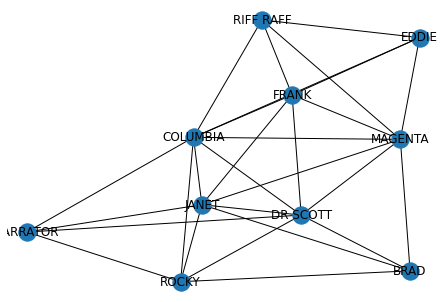

In [11]:
for agent in agents:
    G.add_node(agent.name)

for agent in agents:
    for n in agent.neighbors:
        G.add_edge(agent.name,n.name)
nx.draw(G,with_labels=True)

In [55]:
## do something different

for agent in agents:
    print(agent.statement)
    n=random.choice(agent.neighbors)
    print(n.statement)

BRAD Just a moment, Janet.  They may have a telephone.
FRANK He thinks dynamic tension Must be hard work. Such strenuous living I just don't understand.
JANET Yes.
MAGENTA "night" Or maybe a bite
DR SCOTT He left home the day she died.
NARRATOR But he never caused her Nothing but shame.

FRANK He thinks dynamic tension Must be hard work. Such strenuous living I just don't understand.
NARRATOR But he never caused her Nothing but shame.
FRANK He thinks dynamic tension Must be hard work. Such strenuous living I just don't understand.

BRAD Just a moment, Janet.  They may have a telephone.
MAGENTA "night" Or maybe a bite

FRANK He thinks dynamic tension Must be hard work. Such strenuous living I just don't understand.

COLUMBIA You are very lucky to be invited up to Frank's laboratory.  Some people would give their right arm for the privilege.
MAGENTA "night" Or maybe a bite
EDDIE Stay cool baby.

